# **SARCASM DETECTOR**

## **Hasbi Thaufik Oktodila**
## **FTDS-002-HCK**

# **OBJECTIVES**

Linguistics is one of the most challenging topics in Machine Learning. One factor is because language's dependency on context to generate meaning. However, theoretically, this dependency can be tricked with huge amount of data. Machine probably can pick up the pattern on how human uses sarcastic remarks. This project is aimed to explore whether a machine can learn how to read sarcastic statements.

# **I. IMPORTING LIBRARIES**

In [35]:

# Basic Data Processing
import json                                             # For converting json file to dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Text Cleaning and Preprocessing
import re, string                                       # Text Cleaning                                          
import nltk
from nltk import stem                                             
from nltk.stem import WordNetLemmatizer,PorterStemmer   # Stemmer and lemmatizer
from nltk.corpus import stopwords                       # For cleaning the stopwords
from nltk.tokenize import word_tokenize                 # Tokenize words
from bs4 import BeautifulSoup                           # for cleaning html parser

# Stemmer and Lemmatizer
snow = stem.SnowballStemmer('english')                  # Setting stemmer to english
lemma = WordNetLemmatizer()                             # Setting the lemmatizer

# SKlearn for data preprocessing and Evaluation Metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer         # Types of Vectorizer
from sklearn.model_selection import train_test_split                                 # Data Splitting
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score # Evaluation Metric

#Tensorflow for data preprocessing
import tensorflow as tf                                             # Tensor Flow 
from tensorflow.keras.layers import TextVectorization, Embedding    # Vectorization and Embedding
from tensorflow.keras.preprocessing.text import Tokenizer           # Tokenization
from tensorflow.keras.preprocessing.sequence import pad_sequences   # Padding

import warnings
warnings.filterwarnings('ignore')

snow = stem.SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

# **DATA LOADING**

The dataset is downloaded from kaggle which has two versions. In this 'data loading', we will explore the information on both data to ensure which version is the best for model training.

In [137]:
# First Dataset
df = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)
df

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [138]:
# Second Dataset
df2 = pd.read_json("Sarcasm_Headlines_Dataset_v2.json", lines=True)
df2

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


Checking the balancing of each dataset

In [21]:
df['is_sarcastic'].value_counts() , df2['is_sarcastic'].value_counts()

(0    14985
 1    11724
 Name: is_sarcastic, dtype: int64, 0    14985
 1    13634
 Name: is_sarcastic, dtype: int64)

df2 has more data and more balanced. It looks like we will use df2 for modeling.

Checking null values...

In [22]:
df.isnull().sum() , df2.isnull().sum()

(article_link    0
 headline        0
 is_sarcastic    0
 dtype: int64, is_sarcastic    0
 headline        0
 article_link    0
 dtype: int64)

No null values, proceeding to handling the duplicates...

In [23]:
df.duplicated().any() , df2.duplicated().any()

(True, True)

Showing the duplicated rows..

First dataset (df1):

In [24]:
df[df.duplicated()]

,article_link,headline,is_sarcastic
22014,https://www.huffingtonpost.comhttp://nymag.com...,hillary clinton vs. herself,0


Second dataset (df2)

In [25]:
df2[df2.duplicated()]

,is_sarcastic,headline,article_link
18572,0,hillary clinton vs. herself,https://www.huffingtonpost.comhttp://nymag.com...
25743,1,nation not sure how many ex-trump staffers it ...,https://politics.theonion.com/nation-not-sure-...


Because the amount of duplicated rows is insignificant compared to the whole data, this duplicated rows will be dropped.

In [26]:
df = df.drop_duplicates()
df.duplicated().any()

False

In [27]:
df2 = df2.drop_duplicates()
df2.duplicated().any()

False

Checking the infos on both dataset

In [28]:
# First Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26708 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26708 non-null  object
 1   headline      26708 non-null  object
 2   is_sarcastic  26708 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 834.6+ KB


In [29]:
# Second Dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28617 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28617 non-null  int64 
 1   headline      28617 non-null  object
 2   article_link  28617 non-null  object
dtypes: int64(1), object(2)
memory usage: 894.3+ KB


Removing the irrelevant column:

In [30]:
df.drop(columns='article_link', inplace=True)
df2.drop(columns='article_link', inplace=True)

Checking whether df and df1 contains the same data or not.

In [86]:
df[df['headline']=="america's best 20 hikes"]



,headline,is_sarcastic
26705,america's best 20 hikes,0


In [87]:
df2[df2['headline']=="america's best 20 hikes"]

,is_sarcastic,headline,cleaned
16156,0,america's best 20 hikes,america best 20 hike


It seems df and df2 contains the same data. Since df2 contains more data and more balanced, we will proceed the modeling with df2.

In [31]:
df2.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


# **EXPLORATORY DATA ANALYSIS**

The following is the comparison between the sarcastic and nonsarcastic remarks. (0 = nonsarcastic, 1 = sarcastic)

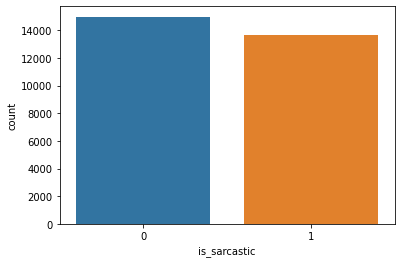

In [32]:
sns.countplot(x='is_sarcastic', data=df2)

The following is the word frequency on sarcastic remark:

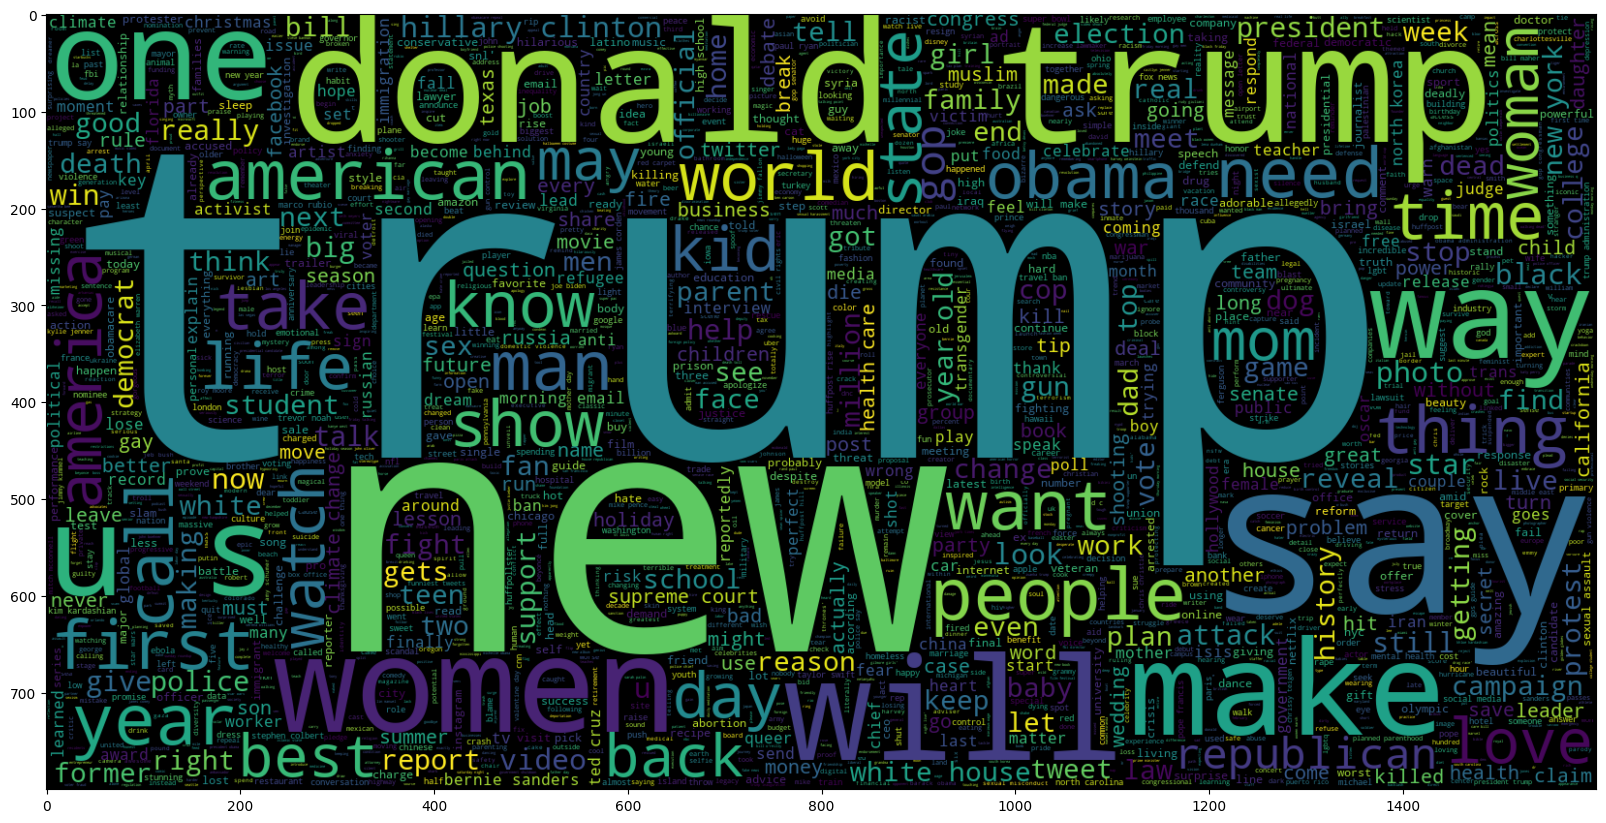

In [134]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 0].headline))
plt.imshow(wc , interpolation = 'bilinear')

We can see that donald trump is the highest frequency on sarcastic remarks. Followed by 'new', 'women', 'say', etc.

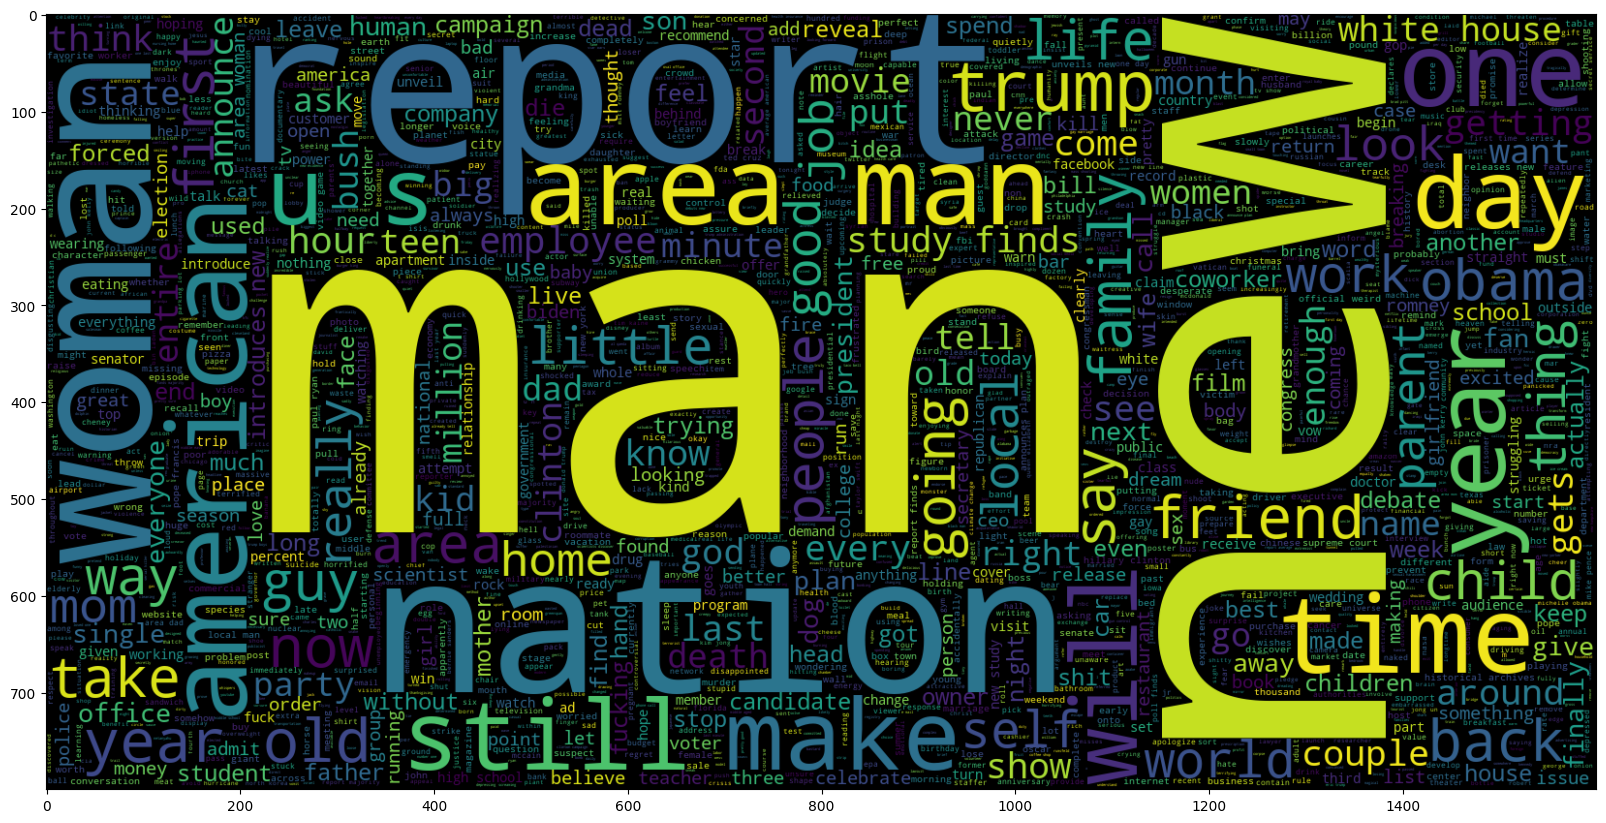

In [135]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 1].headline))
plt.imshow(wc , interpolation = 'bilinear')

On the nonsarcastic remarks however, there's pretty much words that relatively has neutral sentiment. But still, we can see that trump is still in this list.

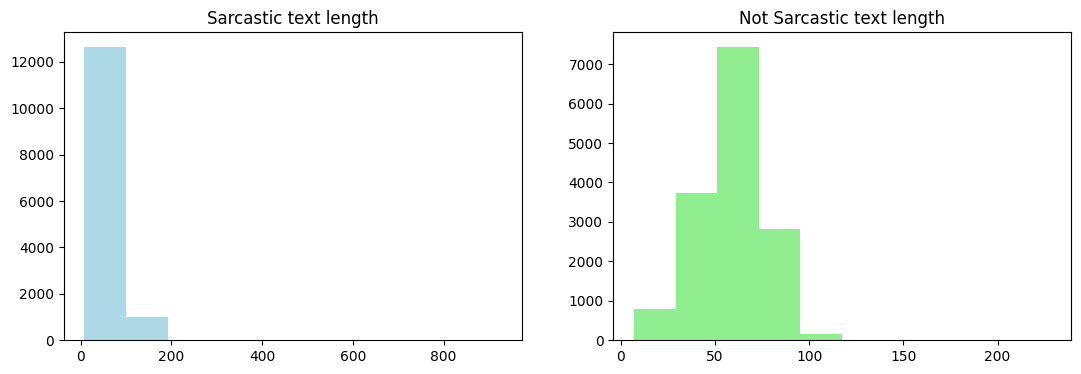

In [93]:
fig1,(ax1,ax2) = plt.subplots(1,2,figsize=(13,4))
text_len = df2[df2['is_sarcastic'] == 1]['headline'].apply(len)
ax1.hist(text_len, color='lightblue')
ax1.set_title('Sarcastic text length')
text_len=df2[df2['is_sarcastic']==0]['headline'].apply(len)
ax2.hist(text_len,color='lightgreen')
ax2.set_title('Not Sarcastic text length');

From the graph above, we can se that the nonsarcastic text have more variety compared to sarcastic texts. Yet, sarcastic text length has higher frequency on each words.

# **TEXT CLEANING**

Checking the random data to see the sentence's behavior to see what needs to be cleaned.

In [33]:
print(df.headline[6969])
print(df.headline[460])
print(df.headline[420])
print(df.headline[322])
print(df.headline[480])
print(df.headline[777])
print(df.headline[757])

registered sex offender allegedly caught working as petco santa claus
why chinese parents don't say 'i love you'
rapture wreaks havoc on local book club
seth meyers loses it over thanksgiving's proximity to christmas
after shooting, orlando chefs provide thousands of free meals
morbidly obese man enjoys disabled privileges with motorized cart
professor threatened with firing says wheaton college is changing the rules


The text seems has been cleaned on several aspects. There's still needs to clean the punctuations. However, we still needs to create a function to clean the data incase it will be needed in inference testing.

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

The following is the function to clean the texts.

In [38]:
stopwords = set(stopwords.words("english"))
punctuations = list(string.punctuation)
stopwords.update(punctuations)

# Remove html parser
def strip_html(text):
    soup = BeautifulSoup(text,  'html.parser')
    return soup.get_text()

# Remove square brackets and symbols
def remove_square_brackets(text):
    return re.sub('\[[^]]*\]' , '' , text)

# Remove URL
def remove_url(text):
    return re.sub('http\S+' , '' , text)

# Remove Punctuations
def remove_puctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Remove Stopwords
def removing_stopwords(text):
    text = text.lower()
    final_text = []
    for i in text.split():
        if(i.strip().lower() not in stopwords):
            final_text.append(snow.stem(i.strip()))
    return ' '.join(final_text)

In [39]:
# Compiling all functions into one function
def denoise(text):
    text = text.lower()
    text = strip_html(text)
    text = remove_square_brackets(text)
    text = remove_url(text)
    text = remove_puctuation(text)
    text = removing_stopwords(text)
    
    return text

Applying the denoise function to our dataframe.

In [40]:
df2['cleaned'] =df2['headline'].apply(denoise)
df2

,is_sarcastic,headline,cleaned
0,1,thirtysomething scientists unveil doomsday clo...,thirtysometh scientist unveil doomsday clock h...
1,0,dem rep. totally nails why congress is falling...,dem rep total nail congress fall short gender ...
2,0,eat your veggies: 9 deliciously different recipes,eat veggi 9 delici differ recip
3,1,inclement weather prevents liar from getting t...,inclement weather prevent liar get work
4,1,mother comes pretty close to using word 'strea...,mother come pretti close use word stream correct
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,jew celebr rosh hashasha someth
28615,1,internal affairs investigator disappointed con...,intern affair investig disappoint conspiraci d...
28616,0,the most beautiful acceptance speech this week...,beauti accept speech week came queer korean
28617,1,mars probe destroyed by orbiting spielberg-gat...,mar probe destroy orbit spielbergg space palac


Removing the uncleaned columns

In [41]:
df_final = df2.drop(['headline'], axis = 1)
df_final

,is_sarcastic,cleaned
0,1,thirtysometh scientist unveil doomsday clock h...
1,0,dem rep total nail congress fall short gender ...
2,0,eat veggi 9 delici differ recip
3,1,inclement weather prevent liar get work
4,1,mother come pretti close use word stream correct
...,...,...
28614,1,jew celebr rosh hashasha someth
28615,1,intern affair investig disappoint conspiraci d...
28616,0,beauti accept speech week came queer korean
28617,1,mar probe destroy orbit spielbergg space palac


Now that the data is clean, let's proceed to data splitting.

# **Data Splitting**

In [42]:
# Assigning the feature (X)
X = df_final['cleaned']

# Assigning the target (y)
y = df_final['is_sarcastic']

Splitting the data:

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

print('Train Feature Shape :', X_train.shape)
print('Train Target Shape :', y_train.shape) 
print('Test Feature Shape :', X_test.shape) 
print('Test Target Shape :', y_test.shape)  

Train Feature Shape : (20031,)
Train Target Shape : (20031,)
Test Feature Shape : (8586,)
Test Target Shape : (8586,)


Result of the split:

In [44]:
X_train

16628                 new father suffer postpartum depress
4957                                magic dolphin slovenia
14917         republican lawmak get idea fox news commerci
15401            love letter nurs take care mom give birth
6583                            true mean ray rice scandal
                               ...                        
16081      autopsi reveal subject still aliv autopsi began
2266     dhs creat fencedin enclosur alqaeda safe carri...
1208           gop clinton could cost democrat battl senat
19614    english professor sudden realiz student believ...
7820     museum proud exhibit picasso shitti enough kan...
Name: cleaned, Length: 20031, dtype: object

## **Text Preprocessing**

> Now, we assign the vocab size to one thousand. By limitting this vocab size will reduce the risk of overfitting because it makes the model less complex.

> For padding type, i use post to make sure the sentence is not getting cut.

> OOV token for detecting the words that are out of vocabularies

In [45]:
vocab_size = 10000
max_length = 32
embedding_dim = 32
padding_type='post'
oov_token = '<OOV>'

> Assignining the tokenizer

In [47]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token = oov_token)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

> Applying the tokenizer to train set

In [48]:
train_sequences = tokenizer.texts_to_sequences(X_train)

> Applying the padding to tokenized sentence.

In [49]:
padded_train_sequences = pad_sequences(train_sequences, maxlen = max_length, padding = padding_type)

> Applying the previous method to test dataset.

In [50]:
test_sequences = tokenizer.texts_to_sequences(X_test)
padded_test_sentences = pad_sequences(test_sequences, maxlen = max_length, padding = padding_type)

> Now we assign the parameter of out model.

> This model will combine lstm and gru with the following parameter:

In [51]:
number_of_epochs = 10
lstm1_dim = 64
lstm2_dim = 32
gru_dim = 32
filters = 128
kernel_size = 5
lr = 0.0001

> The first model will be trained withoud dropout and Adamax activation. Let's see how it performs.

In [102]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 32, 32)            320000    
                                                                 
 conv1d_3 (Conv1D)           (None, 28, 128)           20608     
                                                                 
 global_average_pooling1d_3   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                      

> Compiling the model with adamax optimizer...

In [103]:
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adamax(learning_rate = lr),
    metrics = ['accuracy']
)

> Training the model with 20 epochs

In [106]:
history1 = model1.fit(padded_train_sequences, y_train, epochs = 20, validation_data=(padded_test_sentences, y_test), verbose=1)

Epoch 1/20
626/626 [==============================] - 9s 14ms/step - loss: 0.5170 - accuracy: 0.7452 - val_loss: 0.5514 - val_accuracy: 0.7181
Epoch 2/20
626/626 [==============================] - 7s 11ms/step - loss: 0.5043 - accuracy: 0.7539 - val_loss: 0.5466 - val_accuracy: 0.7211
Epoch 3/20
626/626 [==============================] - 6s 10ms/step - loss: 0.4931 - accuracy: 0.7619 - val_loss: 0.5411 - val_accuracy: 0.7250
Epoch 4/20
626/626 [==============================] - 7s 11ms/step - loss: 0.4828 - accuracy: 0.7677 - val_loss: 0.5373 - val_accuracy: 0.7308
Epoch 5/20
626/626 [==============================] - 8s 13ms/step - loss: 0.4725 - accuracy: 0.7733 - val_loss: 0.5315 - val_accuracy: 0.7315
Epoch 6/20
626/626 [==============================] - 6s 10ms/step - loss: 0.4629 - accuracy: 0.7806 - val_loss: 0.5278 - val_accuracy: 0.7347
Epoch 7/20
626/626 [==============================] - 6s 10ms/step - loss: 0.4535 - accuracy: 0.7867 - val_loss: 0.5247 - val_accuracy: 0.7378

> Plotting the accuracy and lost on both train and test set:

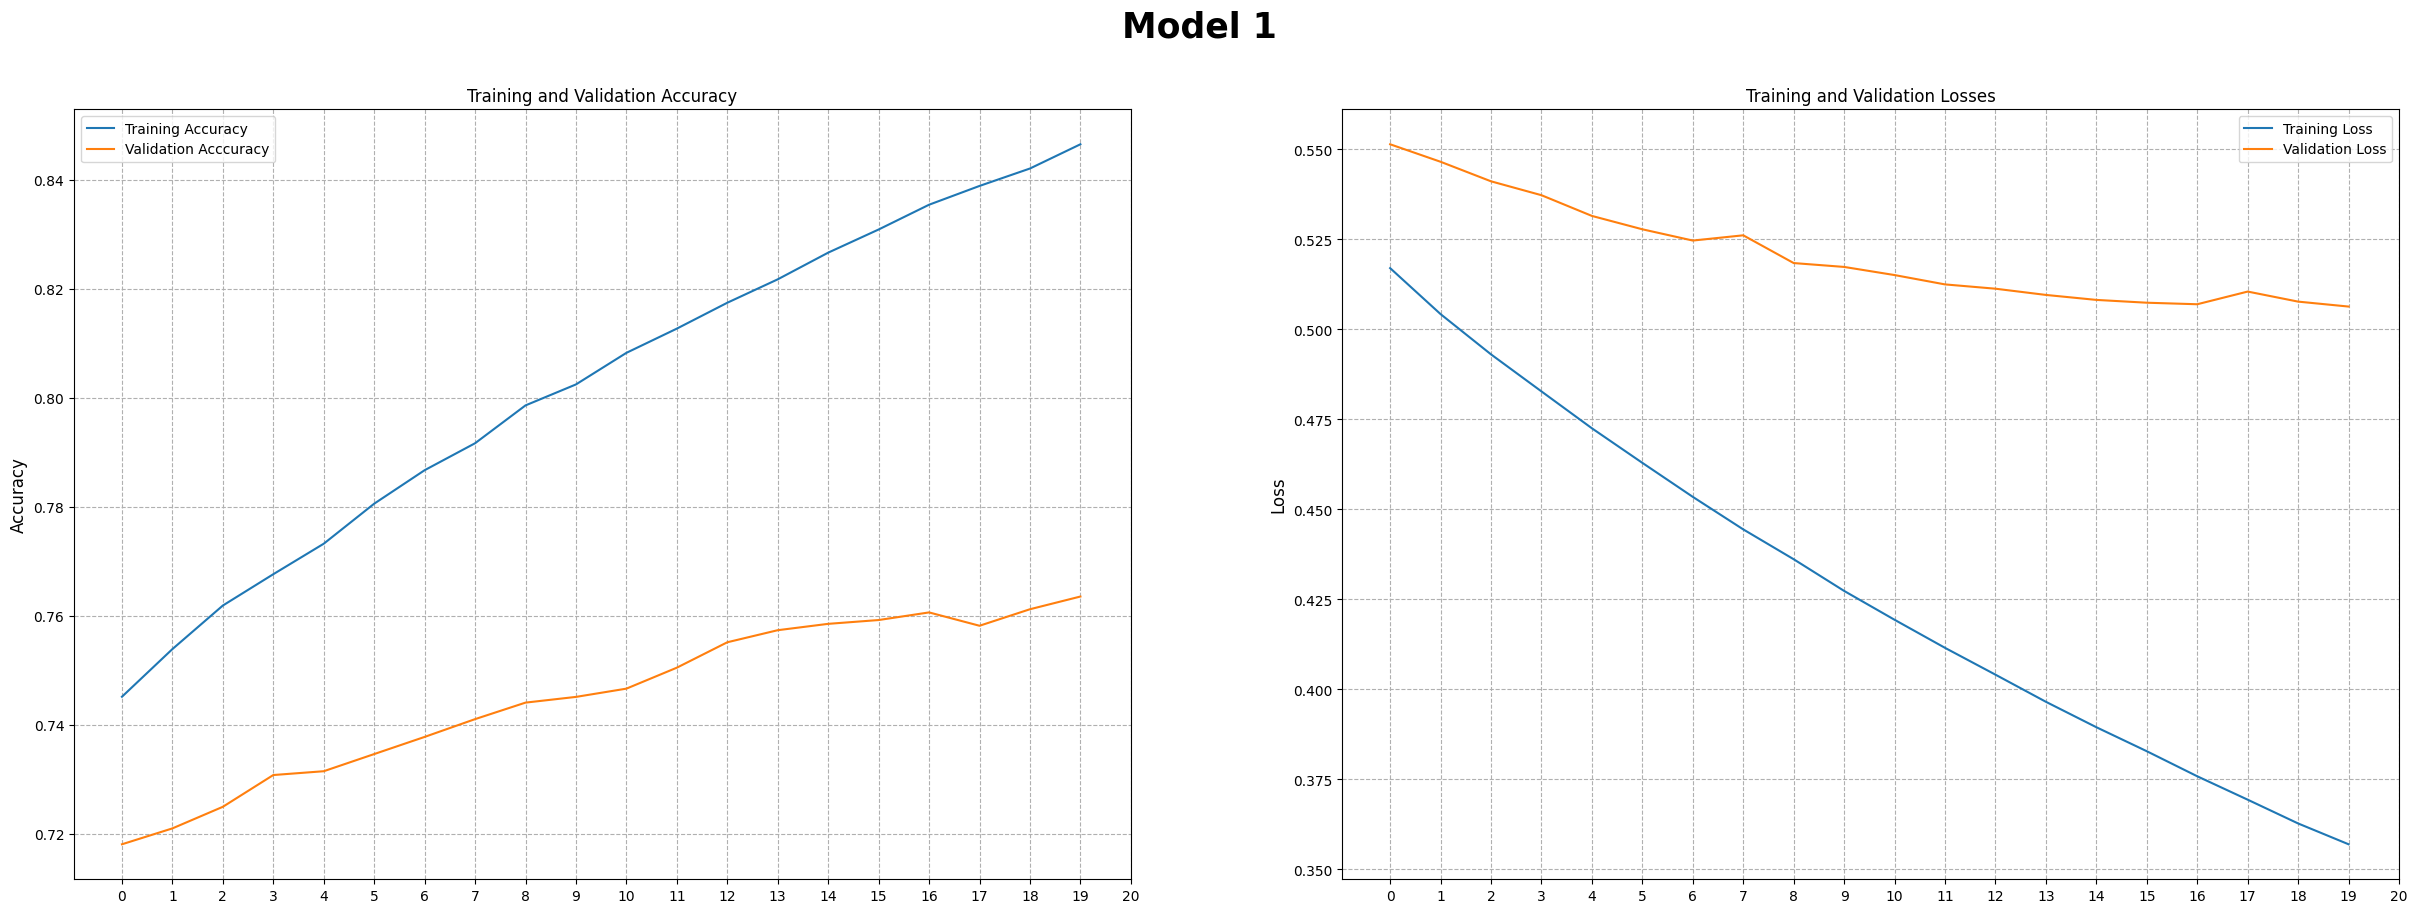

In [108]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Model 1', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history1.history['accuracy'],label="Training Accuracy")
plt.plot(history1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(np.arange(0,21,1))
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history1.history['loss'], label="Training Loss")
plt.plot(history1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.xticks(np.arange(0,21,1))
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

> The model is overwhelmingly overfitting. The longer it trains, the more overfit it becomes. From this model, the most viable model seems is at the third epoch.

> Now, we proceed to improving the model by adding the dropout and change the optimizer into 'Adam'

In [56]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 32, 32)            320000    
                                                                 
 dropout (Dropout)           (None, 32, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 128)           20608     
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

> Compiling the model...

In [57]:
model2.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr),
    metrics = ['accuracy']
)

> Let's try 10 epochs first and see how it goes...

In [58]:
history = model2.fit(padded_train_sequences, y_train, epochs = number_of_epochs, validation_data=(padded_test_sentences, y_test), verbose=1)

Epoch 1/10
626/626 [==============================] - 10s 14ms/step - loss: 0.6914 - accuracy: 0.5234 - val_loss: 0.6891 - val_accuracy: 0.5236
Epoch 2/10
626/626 [==============================] - 9s 14ms/step - loss: 0.6372 - accuracy: 0.6297 - val_loss: 0.5364 - val_accuracy: 0.7340
Epoch 3/10
626/626 [==============================] - 9s 14ms/step - loss: 0.4720 - accuracy: 0.7872 - val_loss: 0.4926 - val_accuracy: 0.7690
Epoch 4/10
626/626 [==============================] - 9s 14ms/step - loss: 0.4053 - accuracy: 0.8285 - val_loss: 0.4872 - val_accuracy: 0.7749
Epoch 5/10
626/626 [==============================] - 9s 14ms/step - loss: 0.3586 - accuracy: 0.8541 - val_loss: 0.4853 - val_accuracy: 0.7813
Epoch 6/10
626/626 [==============================] - 9s 14ms/step - loss: 0.3220 - accuracy: 0.8762 - val_loss: 0.4995 - val_accuracy: 0.7813
Epoch 7/10
626/626 [==============================] - 9s 14ms/step - loss: 0.2932 - accuracy: 0.8880 - val_loss: 0.5056 - val_accuracy: 0.785

> Plotting the evaluation score...

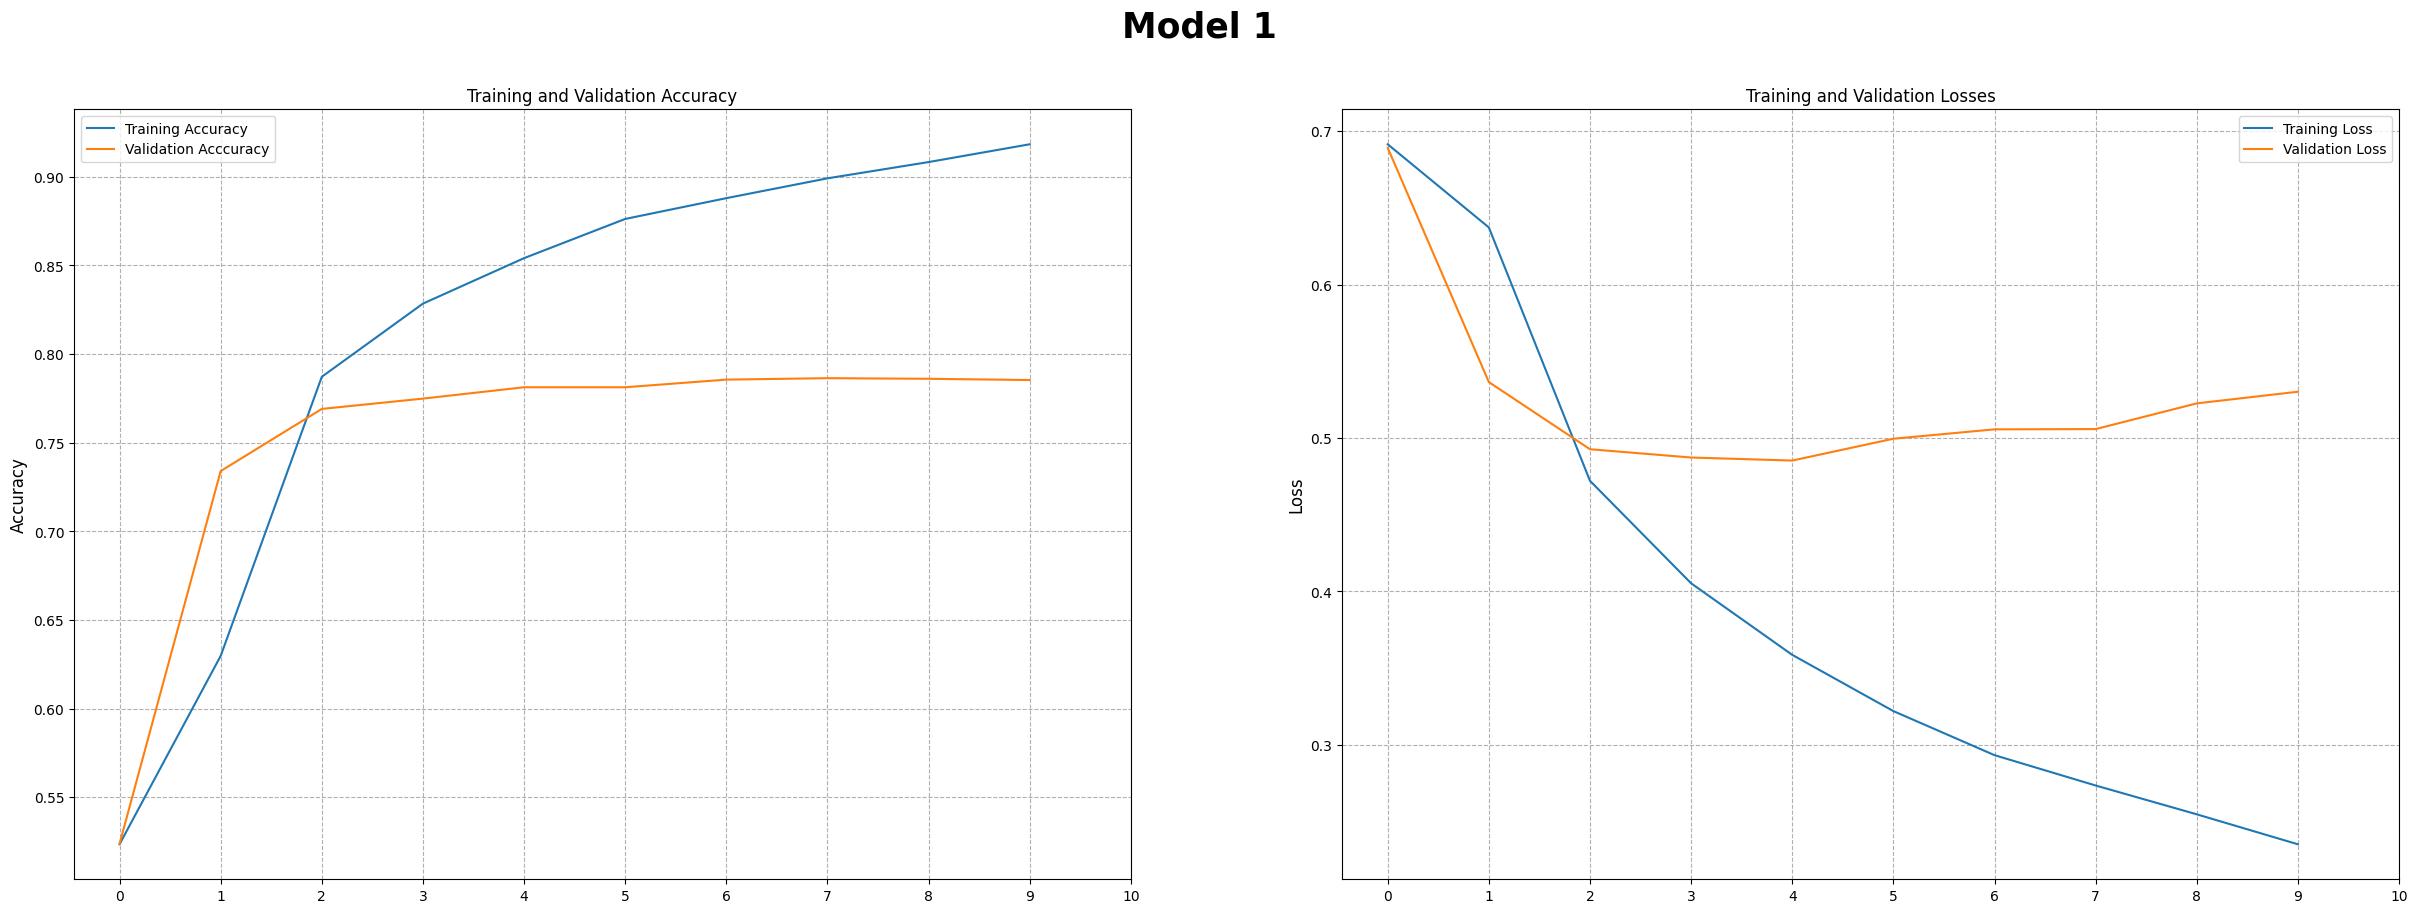

In [59]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Model 1', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history.history['accuracy'],label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(np.arange(0,11,1))
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.xticks(np.arange(0,11,1))
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()


> It seems that the model is still overfitting but not as bad as the previous one. The best epoch from this model seems to be at the second epoch where the distance on accuracy and loss on both train and test set is not that different. The loss distance is also not that big so this definitely the better model than the previous one.

> Let's see the accuracy score on the test set

In [142]:
# First Model
print('Model 1 Accurracy: ', model1.evaluate(padded_test_sentences,y_test)[1]*100)

269/269 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7636
Model 1 Accurracy:  76.35685801506042


In [143]:
# Second Model
print('Model 2 Accuracy: ', model2.evaluate(padded_test_sentences,y_test)[1]*100)


269/269 [==============================] - 1s 4ms/step - loss: 0.5301 - accuracy: 0.7853
Model 2 Accuracy:  78.53482365608215


> Theres 2% increse in accuracy on the improved model. However, the second model's loss score is still relatively higher than the first model.

> Let's try to predict with the first model...

In [109]:
pred1 = model1.predict(padded_test_sentences).flatten()
y_predict1 = []
for i in pred1:
    if i < 0.5:
        y_predict1.append(0)
    else:
        y_predict1.append(1)
y_predict1[:5]

269/269 [==============================] - 1s 4ms/step


[1, 0, 0, 1, 1]

> Now, let's see its classification report and confusion matrix

> 

In [110]:
print(classification_report(y_test, y_predict1, target_names = ['Not Sarcastic','Sarcastic']))

               precision    recall  f1-score   support

Not Sarcastic       0.76      0.80      0.78      4496
    Sarcastic       0.77      0.72      0.74      4090

     accuracy                           0.76      8586
    macro avg       0.76      0.76      0.76      8586
 weighted avg       0.76      0.76      0.76      8586



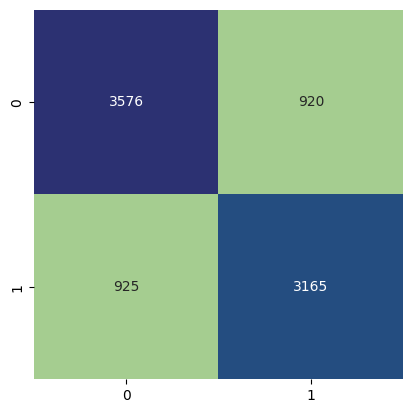

In [64]:
sns.heatmap(confusion_matrix(y_test,y_predict1), square=True, annot=True, cmap='crest', fmt='d', cbar=False);

> Even though the first model is relatively worse than the second model, the classification report is still good. The accuracy is acceptable at 76% and the recall still shows the good number.

> Now, let's try the second model

In [65]:
pred2 = model2.predict(padded_test_sentences).flatten()
y_predict2 = []
for i in pred2:
    if i < 0.5:
        y_predict2.append(0)
    else:
        y_predict2.append(1)
y_predict2[:5]

269/269 [==============================] - 1s 4ms/step


[1, 0, 1, 1, 1]

In [136]:
print(classification_report(y_test, y_predict2, target_names = ['Not Sarcastic','Sarcastic']))

               precision    recall  f1-score   support

Not Sarcastic       0.80      0.78      0.79      4496
    Sarcastic       0.77      0.79      0.78      4090

     accuracy                           0.79      8586
    macro avg       0.79      0.79      0.79      8586
 weighted avg       0.79      0.79      0.79      8586



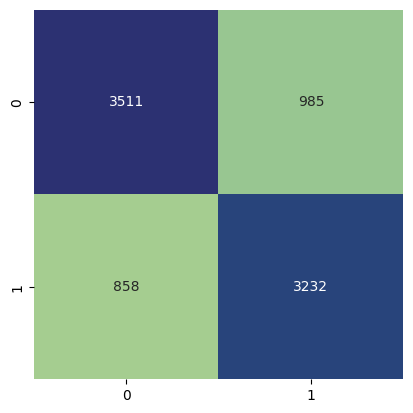

In [67]:
sns.heatmap(confusion_matrix(y_test,y_predict2), square=True, annot=True, cmap='crest', fmt='d', cbar=False);

> The second model is definitely better than the first model. The accuracy is close to 80% and so does the recall score.

> Now that we have out best model, let's proceed to deployment

# **DEPLOYMENT**

> Creating the folder...

In [145]:
!mkdir deployment

mkdir: cannot create directory ‘deployment’: File exists


> Importing the denoise function...

In [146]:
import pickle

with open("pipeline.pkl", "wb") as f:
    pickle.dump(denoise, f)

> Saving the model...

In [147]:
model2.save('model2.h5')

For the final step, let's try our model with random sentence.

# **INFERENCING**

> Our random sentence is : "Trump is converting to democrat"

In [191]:
sentence = "Covid is rising"

> Applying to denoise function..

In [192]:
denoise(sentence)

'covid rise'

> Tokenize and padding the sentence...

In [200]:
inference_sequences = tokenizer.texts_to_sequences([[denoise(sentence)]])
padded_inference = pad_sequences(inference_sequences, maxlen = max_length, padding = padding_type)

In [201]:
inference_sequences

[[1]]

In [202]:
padded_inference

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

> Predicting...

In [203]:
inference_pred = model2.predict(padded_inference).flatten()

1/1 [==============================] - 0s 29ms/step


In [204]:
inference_pred

array([0.08175364], dtype=float32)

> Assigning the zeroes and ones...

In [205]:
pred_inf = model2.predict(padded_inference).flatten()
y_predict_inf = []
for i in pred_inf:
    if i < 0.5:
        y_predict_inf.append(0)
    else:
        y_predict_inf.append(1)
y_predict_inf[:5]

1/1 [==============================] - 0s 24ms/step


[0]

> The model says that this is non sarcastic

In [206]:
np.argmax(y_predict_inf)

0